In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# ndc = pd.read_json('drug-ndc-0001-of-0001.json')
# ndc.head()

In [3]:
with open('data/drug-ndc-0001-of-0001.json', newline='') as ndc_data:
    ndc = json.load(ndc_data)
    results = ndc['results']
#Noah

In [4]:
ndc_df = pd.DataFrame(results)
ndc_df.head(2)

,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,labeler_name,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
0,19870710,HUMAN OTC DRUG,0002-0800_94c48759-29bb-402d-afff-9a713be11f0e,NDA,[SUBCUTANEOUS],diluent,{'manufacturer_name': ['Eli Lilly and Company'...,Sterile Diluent,Sterile Diluent,Eli Lilly and Company,...,0002-0800,True,94c48759-29bb-402d-afff-9a713be11f0e,NDA018781,20201231,"INJECTION, SOLUTION",NaN,NaN,NaN,NaN
1,20021126,HUMAN PRESCRIPTION DRUG,0002-3227_bef991ff-4775-4854-94c1-88081bbf9354,NDA,[ORAL],Atomoxetine hydrochloride,{'manufacturer_name': ['Eli Lilly and Company'...,Strattera,Strattera,Eli Lilly and Company,...,0002-3227,True,bef991ff-4775-4854-94c1-88081bbf9354,NDA021411,20211231,CAPSULE,"[Norepinephrine Reuptake Inhibitor [EPC], Nore...",NaN,NaN,NaN


In [5]:
ndc_df.isna().sum()

marketing_start_date            0
product_type                    0
product_id                      0
marketing_category              0
route                       19508
generic_name                    7
openfda                         0
brand_name                  17452
brand_name_base             17453
labeler_name                    0
packaging                     188
active_ingredients           2566
product_ndc                     0
finished                        0
spl_id                          0
application_number          31967
listing_expiration_date      4452
dosage_form                     0
pharm_class                 87420
brand_name_suffix          120181
marketing_end_date         127128
dea_schedule               126138
dtype: int64

In [6]:
ndc_df.shape

(131578, 22)

In [7]:
ndc_df.dtypes

marketing_start_date       object
product_type               object
product_id                 object
marketing_category         object
route                      object
generic_name               object
openfda                    object
brand_name                 object
brand_name_base            object
labeler_name               object
packaging                  object
active_ingredients         object
product_ndc                object
finished                     bool
spl_id                     object
application_number         object
listing_expiration_date    object
dosage_form                object
pharm_class                object
brand_name_suffix          object
marketing_end_date         object
dea_schedule               object
dtype: object

In [8]:
ndc_df.columns

Index(['marketing_start_date', 'product_type', 'product_id',
       'marketing_category', 'route', 'generic_name', 'openfda', 'brand_name',
       'brand_name_base', 'labeler_name', 'packaging', 'active_ingredients',
       'product_ndc', 'finished', 'spl_id', 'application_number',
       'listing_expiration_date', 'dosage_form', 'pharm_class',
       'brand_name_suffix', 'marketing_end_date', 'dea_schedule'],
      dtype='object')

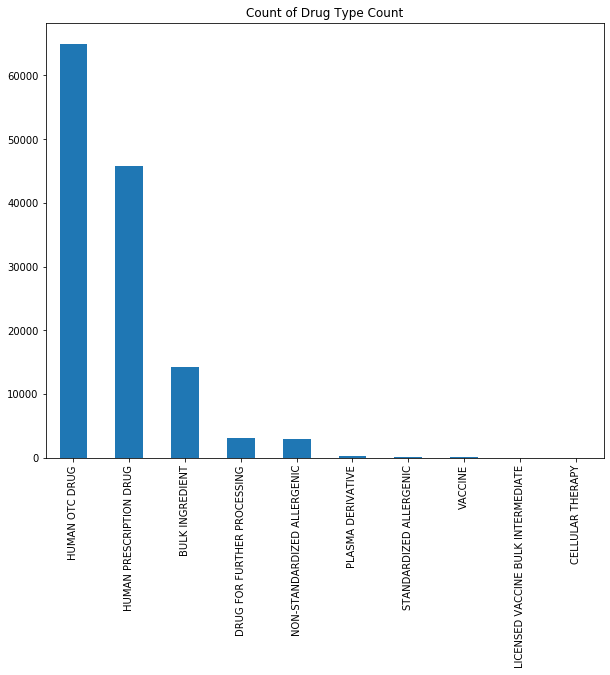

In [9]:
ndc_df['product_type'].value_counts().plot(kind='bar', figsize=(10,8), title='Count of Drug Type Count');

In [10]:
ndc_df['route'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[ORAL]                                                                                56742
[TOPICAL]                                                                             38105
[INTRAVENOUS]                                                                          3502
[SUBCUTANEOUS]                                                                         1333
[INTRADERMAL, PERCUTANEOUS, SUBCUTANEOUS]                                              1315
                                                                                      ...  
[INFILTRATION, INTRA-ARTICULAR, INTRALESIONAL, INTRAMUSCULAR, PERINEURAL, TOPICAL]        1
[INTRAEPIDERMAL]                                                                          1
[INFILTRATION, INTRAMUSCULAR]                                                             1
[HEMODIALYSIS]                                                                            1
[NASAL, TOPICAL]                                                                

In [11]:
#this is the column I really care about - NDC (National Drug Code) to use with the NADAC dataset
#There a duplicates
ndc_df['product_ndc'].value_counts().unique

<bound method Series.unique of 54365-400    23
72766-002    13
72728-002    13
75772-420    11
41701-008    11
             ..
72789-073     1
63940-057     1
62332-486     1
72969-027     1
78692-134     1
Name: product_ndc, Length: 128522, dtype: int64>

In [12]:
#The duplicates are the same drug, with different marketing start dates
ndc_df[ndc_df['product_ndc']=='54365-400']


,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,labeler_name,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
33963,20060818,HUMAN OTC DRUG,54365-400_8b238a81-e278-9dc9-e053-2995a90a4cff,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['8f37915a-292d-4f7b-881a-211d9...,ChloraPrep One-Step,ChloraPrep One-Step,CareFusion 213 LLC,...,54365-400,True,8b238a81-e278-9dc9-e053-2995a90a4cff,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN
33964,20050510,HUMAN OTC DRUG,54365-400_94f4eb0c-cc1e-5dbc-e053-2995a90a5e9e,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['0587e96b-623e-4397-9195-bc5c6...,ChloraPrep One-Step,ChloraPrep One-Step,CareFusion 213 LLC,...,54365-400,True,94f4eb0c-cc1e-5dbc-e053-2995a90a5e9e,NDA021555,20201231,SOLUTION,NaN,NaN,NaN,NaN
46973,20190524,HUMAN OTC DRUG,54365-400_85291b2b-40ba-07fa-e053-2a91aa0a84e4,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['85291b2b-40b9-07fa-e053-2a91a...,ChloraPrep One-Step,ChloraPrep One-Step,"CareFusion 213, LLC",...,54365-400,True,85291b2b-40ba-07fa-e053-2a91aa0a84e4,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN
46974,20190524,HUMAN OTC DRUG,54365-400_8529596f-37e5-c44e-e053-2a91aa0ad014,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['8529596f-37e4-c44e-e053-2a91a...,ChloraPrep One-Step,ChloraPrep One-Step,"CareFusion 213, LLC",...,54365-400,True,8529596f-37e5-c44e-e053-2a91aa0ad014,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN
46975,20000714,HUMAN OTC DRUG,54365-400_8b23770c-520f-b7ef-e053-2995a90a74de,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['adf7e698-bfbb-49b8-961e-dde1b...,ChloraPrep One-Step,ChloraPrep One-Step,CareFusion 213 LLC,...,54365-400,True,8b23770c-520f-b7ef-e053-2995a90a74de,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN
46976,20000714,HUMAN OTC DRUG,54365-400_8b238a81-e21f-9dc9-e053-2995a90a4cff,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['1eaa15c7-05ad-4e20-a0b8-f9183...,ChloraPrep One-Step,ChloraPrep One-Step,CareFusion 213 LLC,...,54365-400,True,8b238a81-e21f-9dc9-e053-2995a90a4cff,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN
60439,20190524,HUMAN OTC DRUG,54365-400_85791e13-4104-19fe-e053-2991aa0a647f,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['85791e13-4103-19fe-e053-2991a...,ChloraPrep One-Step,ChloraPrep One-Step,"CareFusion 213, LLC",...,54365-400,True,85791e13-4104-19fe-e053-2991aa0a647f,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN
60441,20020426,HUMAN OTC DRUG,54365-400_8b239803-84a2-8e5b-e053-2995a90a637b,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['5b390556-5379-4367-9b1f-56703...,ChloraPrep One-Step,ChloraPrep One-Step,CareFusion 213 LLC,...,54365-400,True,8b239803-84a2-8e5b-e053-2995a90a637b,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN
60442,20060818,HUMAN OTC DRUG,54365-400_8b239803-84b8-8e5b-e053-2995a90a637b,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['cf938014-57fc-4ff2-92a0-6dee1...,ChloraPrep One-Step,ChloraPrep One-Step,CareFusion 213 LLC,...,54365-400,True,8b239803-84b8-8e5b-e053-2995a90a637b,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN
73431,20190524,HUMAN OTC DRUG,54365-400_8578da30-a156-2505-e053-2991aa0a2c04,NDA,[TOPICAL],chlorhexidine gluconate and isopropyl alcohol,{'spl_set_id': ['8578da30-a155-2505-e053-2991a...,ChloraPrep One-Step,ChloraPrep One-Step,"CareFusion 213, LLC",...,54365-400,True,8578da30-a156-2505-e053-2991aa0a2c04,NDA020832,20201231,SOLUTION,NaN,NaN,NaN,NaN


In [13]:
#I will drop duplicated ndc entries
#I sorted by marketing start date, so I can keep the one with the newest start date
ndc_df = ndc_df.sort_values('marketing_start_date', ascending=False).drop_duplicates(['product_ndc'])
#https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/#:~:text=To%20sort%20a%20dataframe%20based,use%20the%20argument%20ascending%3DFalse.

In [14]:
#re-sort by the index
#https://www.geeksforgeeks.org/python-pandas-dataframe-sort_index/
ndc_df.sort_index(inplace=True)

In [15]:
ndc_df.shape

(128522, 22)

In [16]:
ndc_df.dtypes

marketing_start_date       object
product_type               object
product_id                 object
marketing_category         object
route                      object
generic_name               object
openfda                    object
brand_name                 object
brand_name_base            object
labeler_name               object
packaging                  object
active_ingredients         object
product_ndc                object
finished                     bool
spl_id                     object
application_number         object
listing_expiration_date    object
dosage_form                object
pharm_class                object
brand_name_suffix          object
marketing_end_date         object
dea_schedule               object
dtype: object

In [17]:
#Remove the - from ndc so I can make it an integer
#ndc_df['product_ndc'] = ndc_df['product_ndc'].str.replace('-', '')

In [18]:
#ndc_df['product_ndc'] = ndc_df['product_ndc'].astype(int)

In [19]:
ndc_df.dtypes

marketing_start_date       object
product_type               object
product_id                 object
marketing_category         object
route                      object
generic_name               object
openfda                    object
brand_name                 object
brand_name_base            object
labeler_name               object
packaging                  object
active_ingredients         object
product_ndc                object
finished                     bool
spl_id                     object
application_number         object
listing_expiration_date    object
dosage_form                object
pharm_class                object
brand_name_suffix          object
marketing_end_date         object
dea_schedule               object
dtype: object

In [20]:
ndc_df[['product_ndc']]


,product_ndc
0,0002-0800
1,0002-3227
2,0409-4091
3,73061-000
4,73061-001
...,...
131573,73025-060
131574,73025-064
131575,73029-0009
131576,73038-103


In [21]:
ndc_df.tail()

,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,labeler_name,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
131573,20200601,HUMAN OTC DRUG,73025-060_a3f678ec-fb94-29db-e053-2995a90a4c71,OTC MONOGRAPH NOT FINAL,[TOPICAL],ALCOHOL,{'spl_set_id': ['89d3687d-89ae-7026-e053-2a95a...,Spatherapy Anti-bacterial Hand Cucumber Aloe,Spatherapy Anti-bacterial Hand Cucumber Aloe,Shalom International Corp,...,73025-060,True,a3f678ec-fb94-29db-e053-2995a90a4c71,part333E,20211231,GEL,NaN,NaN,NaN,NaN
131574,20200701,HUMAN OTC DRUG,73025-064_aa195765-0ba3-8856-e053-2995a90afc8c,OTC MONOGRAPH NOT FINAL,[TOPICAL],ALCOHOL,{'spl_set_id': ['2e5b875d-5f7e-4192-ac53-47bae...,Spatherapy Antibacterial Hand,Spatherapy Antibacterial Hand,Shalom International Corp,...,73025-064,True,aa195765-0ba3-8856-e053-2995a90afc8c,part333E,20211231,SPRAY,NaN,NaN,NaN,NaN
131575,20190201,HUMAN OTC DRUG,73029-0009_9e35a652-5169-61b8-e053-2995a90a4792,OTC MONOGRAPH FINAL,[DENTAL],SODIUM MONOFLUOROPHOSPHATE,{'spl_set_id': ['9e32f085-0f1a-3919-e053-2a95a...,Dr. Zenni GGOMA ToothpasteVanilla flavor,Dr. Zenni GGOMA ToothpasteVanilla flavor,"Zeniton Co.,Ltd.",...,73029-0009,True,9e35a652-5169-61b8-e053-2995a90a4792,part355,20211231,"PASTE, DENTIFRICE",NaN,NaN,NaN,NaN
131576,20200312,HUMAN OTC DRUG,73038-103_82354cf8-761e-4621-ba97-2648745d1cf6,OTC MONOGRAPH NOT FINAL,[TOPICAL],BENZALKONIUM CHLORIDE,{'spl_set_id': ['10635562-efe6-4e7a-a866-b1b33...,HAND SANITIZER,HAND SANITIZER,SNYDER MANUFACTURING CORP,...,73038-103,True,82354cf8-761e-4621-ba97-2648745d1cf6,part333A,20211231,SOLUTION,NaN,NaN,NaN,NaN
131577,20190706,HUMAN OTC DRUG,73054-104_8c3bb49b-cf75-4311-9d9c-d67fe19adfb5,OTC MONOGRAPH NOT FINAL,[TOPICAL],ZINC OXIDE,{'spl_set_id': ['ab6a326d-3b93-4122-a9f2-05e82...,SOLARA SUNCARE - POUT PROTECTOR SPF-15,SOLARA SUNCARE - POUT PROTECTOR,"SOLARA SUNCARE, INC.",...,73054-104,True,8c3bb49b-cf75-4311-9d9c-d67fe19adfb5,part352,20201231,CREAM,NaN,SPF-15,NaN,NaN


In [22]:
#ndc numbers did not line up (I tried merging the ndc data frame with this but they have not been entered in the same way)
#if there is a way to use active ingredient as a match up, I might be able to get somewhere
#If not, I might have to search through the data frame for drugs?

In [23]:
ndc_df.to_csv('data/ndc_df.csv')

In [24]:
nadac = pd.read_csv('data/nadac_no_repeats.csv')